# Plot animation

In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import sys

# Move two levels up (to the project root) and append the `src` folder
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

# Append src to sys.path
sys.path.append(src_path)

from src import query_engines, dataframe_visualizer, dataframe_movie

q = query_engines.QueryEngines()

# Query

# Temporal evolution

In [3]:
START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)}
]

q.prepare_query(
    'plot_animation.sql'
    ,params=params
    ,to_load_file='plot_animation'
    ,load_from_to_load_file='plot_animation'
)

orders  = q.query_run_starburst()

orders['p_creation_date'] = pd.to_datetime(orders['p_creation_date'])

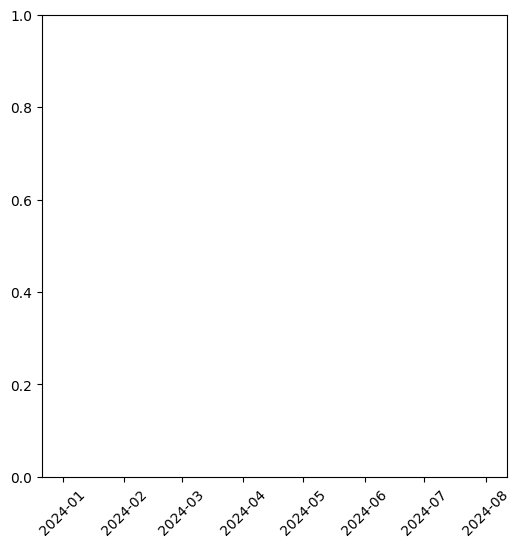

In [5]:
# Create an instance of DataFrameVisualizer
visualizer = dataframe_visualizer.DataFrameVisualizer(orders)

# Define the plot configurations for each subplot
plot_configs = [
    {
        'plot_type': 'lineplot',
        'x_column': 'p_creation_date',
        'y_columns': ['n_orders', 'n_customers'],
    },
    # {
    #     'plot_type': 'lineplot',
    #     'x_column': 'p_creation_date',
    #     'y_columns': ['n_customers'],
    # },
    # {
    #     'plot_type': 'scatterplot',
    #     'x_column': 'p_creation_date',
    #     'y_columns': ['n_orders'],
    #     'colors': ['orange']
    # },
    # {
    #     'plot_type': 'lineplot',
    #     'x_column': 'p_creation_date',
    #     'y_columns': ['n_customers'],
    # }
]

figure_params = {
    'n_plots': 1,
    'fig_length': 6,
    'fig_height': 6,
    # 'y_min': 0,
    # 'y_max':1000000,
    'x_rotation': 45,
    'share_x': True,
    'share_y': False,
}


# Call the plot method to handle the entire flow
visualizer.plot(
    method='static', 
    figure_params=figure_params,
    plot_configs=plot_configs
)

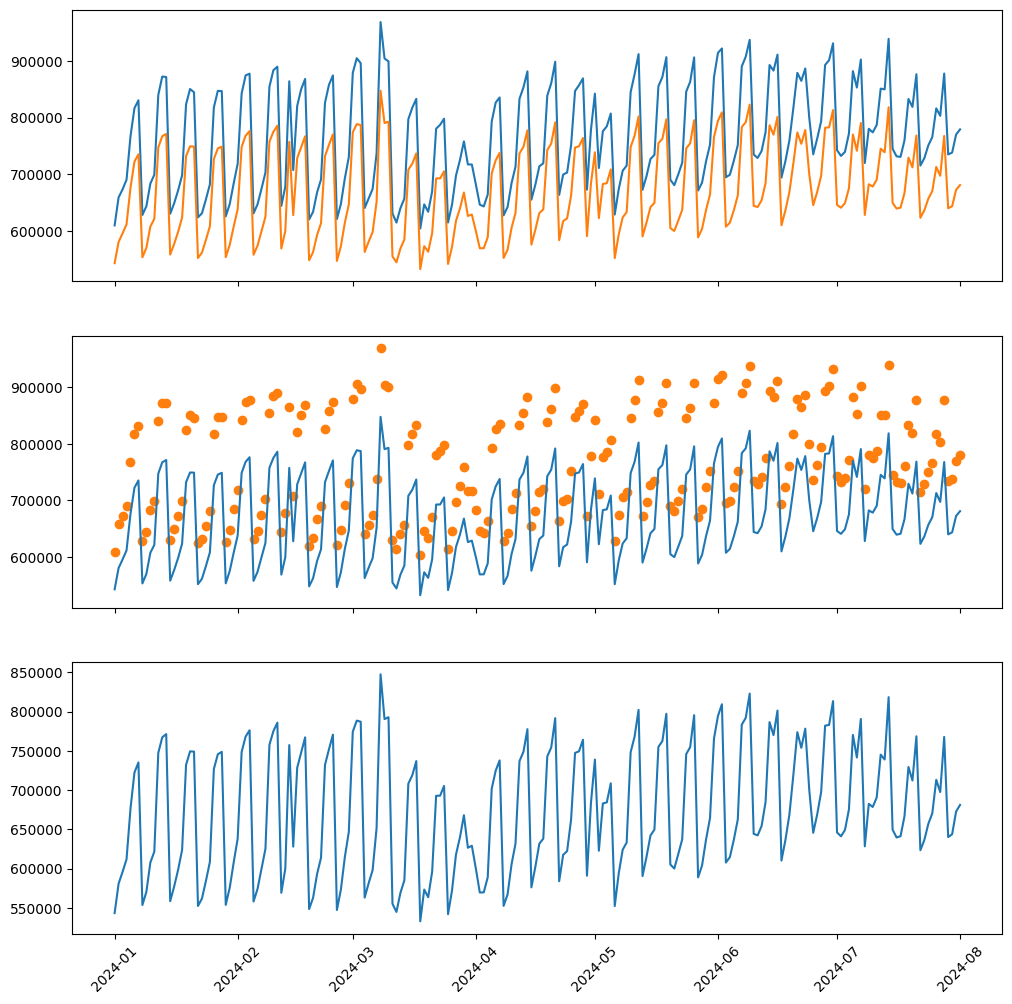

In [10]:
# Create an instance of DataFrameVisualizer
visualizer = dataframe_visualizer.DataFrameVisualizer(orders)

# Define the figure and axes
fig, axes = visualizer.create_figure(
    n_plots=3, 
    fig_length=12, 
    fig_height=12, 
    x_rotation=45,
    share_x=True, 
    share_y=False)

# Plot the data on the first axis
visualizer.multiple_variable_lineplot(x_column='p_creation_date', y_columns=['n_orders', 'n_customers'], ax=axes[0])

# Plot on the second axis if needed
visualizer.multiple_variable_lineplot(x_column='p_creation_date', y_columns=['n_customers'], ax=axes[1])

# Plot on the second axis if needed
visualizer.multiple_variable_scatterplot(x_column='p_creation_date', y_columns=['n_orders'], colors=['orange'], ax=axes[1])

# Plot on the second axis if needed
visualizer.multiple_variable_lineplot(x_column='p_creation_date', y_columns=['n_customers'], ax=axes[2])

# Show the figure
plt.show()

In [4]:
orders

,p_creation_date,n_orders,n_customers
0,2024-01-01,610009,543436
1,2024-01-02,659340,580890
2,2024-01-03,673487,595974
3,2024-01-04,690514,611920
4,2024-01-05,767205,676534
...,...,...,...
209,2024-07-28,877660,767717
210,2024-07-29,735122,640280
211,2024-07-30,738348,643835
212,2024-07-31,770190,672787


In [ ]:
v.multiple_variable_lineplot(
    'p_creation_date',
    ['n_orders','n_customers'],
    
)

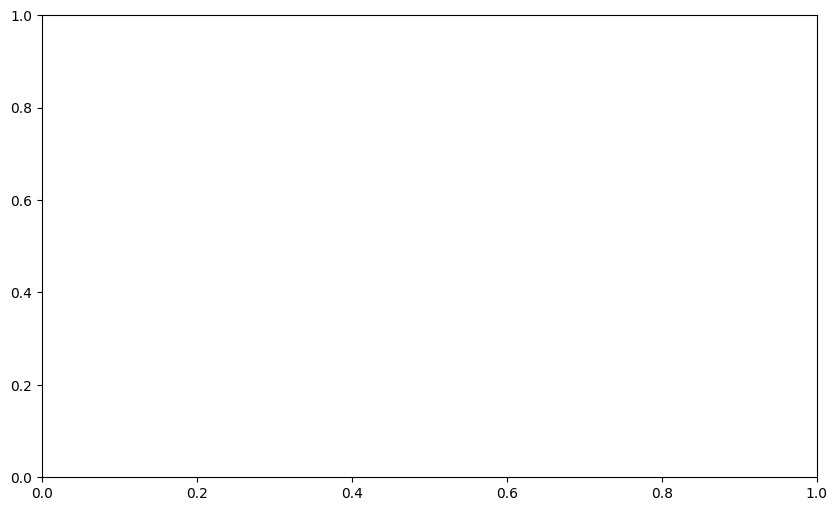

In [5]:
v = dataframe_visualizer.DataFrameVisualizer(orders)

v.create_figure_and_axes(
    n_rows=1,
    n_cols=1
)

plot_params={
    'x_column': 'p_creation_date',
    'y_columns': ['n_orders'],
    'colors': ['blue'],
    'styles': ['-']
},

v.plot_on_axis(
    'multiple_variable_lineplot',
    plot_params,
    ax_idx=0
)

In [3]:
DURATION_PER_FRAME = 1000
N_SPLITS = 10
LENGTH = 20
HEIGHT = 10

m = dataframe_movie.DataFrameMovie(orders)
orders = m.create_m_splits('p_creation_date', N_SPLITS)
m = dataframe_movie.DataFrameMovie(orders)

plot_params = {
    'x_column': 'p_creation_date',
    'y_columns': ['n_customers','n_orders'],
    'styles': ['-','-'],
}

# Animate the movie using the plot type 'multiple_variable_lineplot'
m.animate_movie(
    plot_type='movie_multiple_variable_lineplot',
    plot_params=plot_params,
    duration_per_frame=DURATION_PER_FRAME,
    output_filename='temporal evolution',
    fig_length=LENGTH,
    fig_height=HEIGHT,
    y_min=0,
)

Animation saved as movies/temporal evolution.gif


# Categories

In [4]:
START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)}
]

q.prepare_query(
    'plot_animation_v2.sql'
    ,params=params
    ,to_load_file='plot_animation_v2'
    ,load_from_to_load_file='plot_animation_v2'
)

countries  = q.query_run_starburst()

In [5]:
DURATION_PER_FRAME = 1000
LENGTH = 20
HEIGHT = 10

m = dataframe_movie.DataFrameMovie(countries)
countries = m.create_m_splits_by_category('order_country_code')
m = dataframe_movie.DataFrameMovie(countries)

plot_params = {
    'x_column': 'order_country_code',
    'y_columns': ['n_customers','n_orders'],
    'styles': ['-','-'],
}

# Animate the movie using the plot type 'multiple_variable_lineplot'
m.animate_movie(
    plot_type='movie_multiple_variable_lineplot',
    plot_params=plot_params,
    duration_per_frame=DURATION_PER_FRAME,
    output_filename='country evolution',
    fig_length=LENGTH,
    fig_height=HEIGHT,
    y_min=0,
)

Animation saved as movies/country evolution.gif


# Temporal evolution with goal

In [6]:
START_DATE = "'2016-01-01'"
END_DATE = "'2024-09-01'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)}
]

q.prepare_query(
    'plot_animation_v3.sql'
    ,params=params
    ,to_load_file='plot_animation_v3'
    ,load_from_to_load_file='plot_animation_v3'
)

goal  = q.query_run_starburst()

goal['p_creation_date'] = pd.to_datetime(goal['p_creation_date'])

In [15]:
goal['n_ordres_cum'] = goal['n_orders'].cumsum()
goal['goal'] = 1000000000

DURATION_PER_FRAME = 25
N_SPLITS = 1060
LENGTH = 20
HEIGHT = 10

m = dataframe_movie.DataFrameMovie(goal)
goal = m.create_m_splits('p_creation_date', N_SPLITS)
m = dataframe_movie.DataFrameMovie(goal)

plot_params = {
    'x_column': 'p_creation_date',
    'y_columns': ['n_ordres_cum','goal'],
    'styles': ['-',':'],
}

# Animate the movie using the plot type 'multiple_variable_lineplot'
m.animate_movie(
    plot_type='movie_multiple_variable_lineplot',
    plot_params=plot_params,
    duration_per_frame=DURATION_PER_FRAME,
    output_filename='temporal evolution goal',
    fig_length=LENGTH,
    fig_height=HEIGHT,
    y_min=0,
    y_max=1200000000,
    icon_paths=['icons/rocket.png', 'icons/goal.png'],  # List of icon paths
    icon_columns=['n_ordres_cum', 'goal'],  # The columns to attach the icons
    icon_zooms=[0.3, 0.3]  # Zoom levels for each icon
)

Animation saved as movies/temporal evolution goal.gif


In [14]:
goal

,p_creation_date,n_orders,n_customers,n_ordres_cum,goal,movie,m_start,m_end
0,2016-01-01,172,79,172,1000000000,1,2016-01-01 00:00:00,2016-01-06 06:38:24
1,2016-01-02,155,87,327,1000000000,1,2016-01-01 00:00:00,2016-01-06 06:38:24
2,2016-01-03,177,101,504,1000000000,1,2016-01-01 00:00:00,2016-01-06 06:38:24
3,2016-01-04,200,148,704,1000000000,1,2016-01-01 00:00:00,2016-01-06 06:38:24
4,2016-01-05,267,171,971,1000000000,1,2016-01-01 00:00:00,2016-01-06 06:38:24
...,...,...,...,...,...,...,...,...
3162,2024-08-28,743297,649322,946912120,1000000000,600,2024-08-26 17:21:36,2024-09-01 00:00:00
3163,2024-08-29,778078,680645,947690198,1000000000,600,2024-08-26 17:21:36,2024-09-01 00:00:00
3164,2024-08-30,864064,754836,948554262,1000000000,600,2024-08-26 17:21:36,2024-09-01 00:00:00
3165,2024-08-31,881784,764643,949436046,1000000000,600,2024-08-26 17:21:36,2024-09-01 00:00:00
